# IA Paper 4 - Mathematics - Examples paper 4

## Question 7

In an epidemic, there are at any particular time x people not yet infected and y people who are ill. The rate at which people become ill is $\alpha x$, where $\alpha$ is a constant. If x is initially equal to N, find an expression for x at time t. (Regard the numbers of people x and y as continuous variables.) 

The rates of recovery and death of those who are ill are $\beta y$ and $\gamma y$, respectively. If y is initially equal to zero, find an expression for the number of deaths up to time t from the start of the epidemic. (Assume that those who recover are immune from further infection.) 

The expression for the number of deaths appears to be indeterminate if $\alpha = \beta + \gamma$. Find the limiting form of the expression as $\beta + \gamma \rightarrow \alpha$.

Not all differential equations can be solved algebraically: sometimes numerical integration is the only option. Use Python to solve the system of equations numerically, and compare the numerical and exact solutions graphically.

__Python hints__ 
- Start by choosing your $\alpha$, $\beta$, $\gamma$ values and an arbitrary total number of people.  
- Use Euler integration to find the solutions numerically. The Euler method estimates the next value by approximating the solution to be a straight line from the previous point, with gradient equal to the derivative at the original point.  
- The Euler integration method is a first-order method, which means that the local error (error per step) is proportional to the square of the step size, and the global error (error at a given time) is proportional to the step size. If you wish for an extension, try plotting several step size values on the same plot, or plot the average error against the step size to see this relationship.



### Solution

First we import all relevant modules. We will need numpy and matplotlib.pyplot. We also use the command for inline plotting in Jupyter notebooks.

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Special command for plotting inside a Jupyter notebook
%matplotlib inline

We define the parameters $\alpha$, $\beta$, $\gamma$ and N for the simulation- experiment with different values.

In [2]:
# Rate of infection
α = 0.5

# Rate of recovory
β = 0.5

# Rate of death
γ = 0.5

# Total population
N = 1000

We define the initial conditions (supplied by the question).

In [3]:
# Number of healthy people intially
x = N

# Number of people who are ill initially
y = 0

# Number of dead people initially
z = 0

# Starting time
t = 0

We set the time parameters- the appromimate total time to run over and the step size.

In [4]:
# Maximum time over which to run simulation
tmax = 10

# Interval step size
Δt = 0.2

# Number of time points (length of arrays) (includes t = 0)
length = round(((tmax)/Δt) + 1)

We initialize arrays of the correct length for the the number of healthy, ill and dead people as well as time, to record the various counts at each time step so we can plot the trajectories later (the first member of the list is the initial condition for that variable, the second member is that variable a time dt later).

In [5]:
# Initialises arrays filled with zeros
X = np.zeros(length)
Y = np.zeros(length)
Z = np.zeros(length)
T = np.zeros(length)

We create the main loop - we iterate over the length of the array corresponding to time steps of `dt` up to `tmax`. This is the integration part - we use the Euler method.

We use the fact that, for example, $x = x + (dx/dt) \Delta t $ to find the x value for the next step, dt further along:

$$ 
x_{i+1} = x_i - \alpha x_i \Delta t \\
y_{i+1} = y_i + \alpha x_i \Delta t - \beta y_i \Delta t - \gamma y_i \Delta t \\
z_{i+1} = z_i + \gamma y_i \Delta t
$$

We we end up with four arrays, `X`, `Y`, `Z` and `T` which contain our time steps and the numerically calculated values for x, y and z.

In [6]:
for i in range(0, length):
    # Changes the ith position to the current x, y, z and t values.
    X[i] = x
    Y[i] = y
    Z[i] = z
    T[i] = Δt * i

    # Temporary values of x, y and z are needed to store the current values.
    xtemp = x
    ytemp = y
    ztemp = z

    # Calulates the next value of x, y, z from the current values and gradients
    # These values are added to the arrays on the next iteration.
    x = xtemp - α*xtemp*Δt
    y = ytemp + α*xtemp*Δt - β*ytemp*Δt - γ*ytemp*Δt
    z = ztemp + γ*ytemp*Δt

We calculate the exact solution, for comparison.

First we must create the arrays to hold our exact solutions.  We create another time array so we can reduce the step size for the numerical integration without effecting how often we sample the exact solution. We set the intervals to give us an appropriate degree of precision.

In [7]:
# Interval size for t for exact solution
number_of_t_steps = 1001

# Creates a T array to hold the values at which we clculate the exact solutions
T_exact = np.linspace(0, tmax, number_of_t_steps)

# Creates arrays for the exact solutions
X_exact = np.zeros(number_of_t_steps)
Y_exact = np.zeros(number_of_t_steps)
Z_exact = np.zeros(number_of_t_steps)

We then fill the arrays with the exact values at each time value, from our equations as calculated in the question:   

$$
x = Ne^{-\alpha t}\\ 
y = \frac{\alpha N}{\beta + \gamma - \alpha} \big(e^{-\alpha t} - e^{-(\beta +\gamma)t}\big)\\
z = \frac{\alpha \gamma N}{\beta + \gamma - \alpha}  \Big( \frac{1-e^{-\alpha t}}{\alpha} - \frac{1- e^{-(\beta +\gamma )t}}{\beta +\gamma} \Big)
$$

In [8]:
# Calculates all exact values
X_exact = (N*np.exp(-α*T_exact))
Y_exact = ((α*N)/(β + γ - α)*(np.exp(-α * T_exact) - np.exp(-(β + γ)*T_exact)))
Z_exact = ((α*γ*N)/(β + γ - α)*((1 - np.exp(-α*T_exact))/α - (1 - np.exp(-(β + γ)*T_exact))/(β + γ)))

We finally plot the numerical solutions on the same axes as the exact solutions.

#### Extension 1 

We can plot the curves for various step sizes on the same plot to show the affect of changing $\Delta t$.

The code below comes in several parts.  First, a figure is created to hold the three subplots for the three population groups. Then, a loop is created to plot the above three subplots for several different `dt` values. You can vary these as you wish, but for now it is set to run through several multiples.
We then set the initial values of x, y and z (we use the other constants from earlier) and create arrays to hold these values for a single `dt` value.
We then create a loop (as before) to calculate the numerical solution for the current iteration of the $\Delta t$ value. After that we plot the current plots for `dt` and then run the iteration again from the top.
Out of the loop, we add the exact solution and clean up the plot.

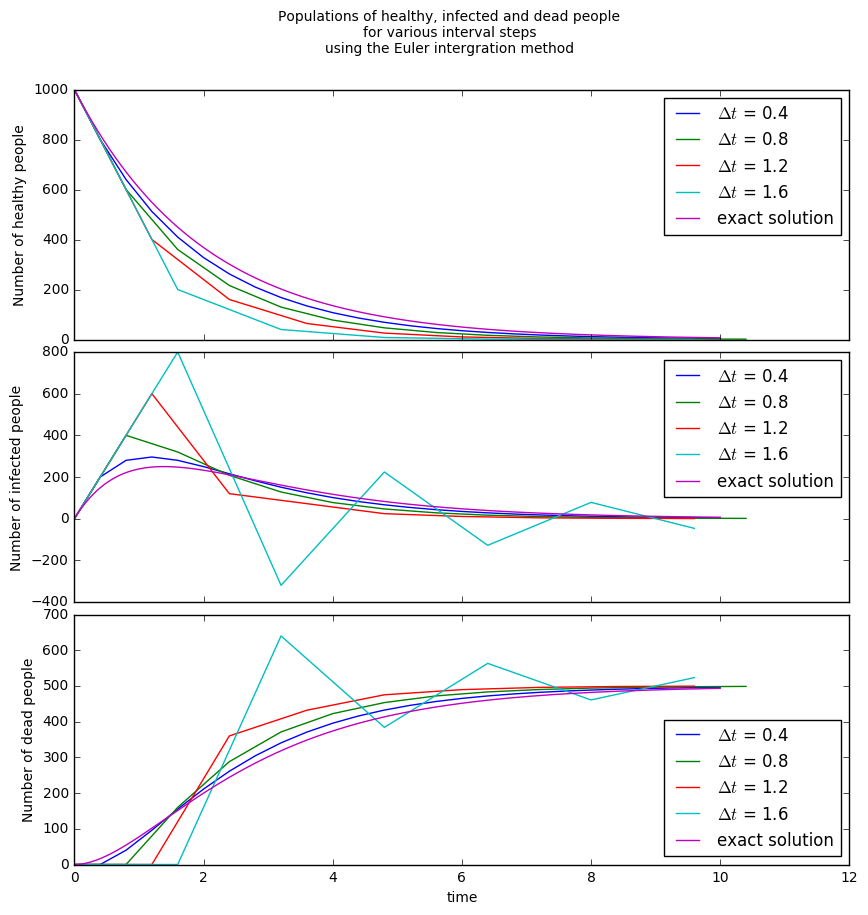

In [9]:
# Creates figure and exes for the three subplots
fig2, (axHealthy2, axIll2, axDead2) = plt.subplots(3, figsize=(10, 10))

# Start of iterative loop over dt values
i = 1

while i <= 4:

    # Loops over several values of dt
    Δt = (0.4*i)

    # Number of time points (length of arrays) (includes t = 0)
    length = round(((tmax)/Δt) + 1)

    # Reinitialises the intial values for each loop
    x = N
    y = 0
    z = 0

    # Initialises arrays filled with zeros
    Xi = np.zeros(length)
    Yi = np.zeros(length)
    Zi = np.zeros(length)
    Ti = np.zeros(length)

    # Creates a loop to calculate the num solution for the current dt value
    for j in range(0, length):

        # Changes the jth position to the current x, y, z and t values.
        Xi[j] = x
        Yi[j] = y
        Zi[j] = z
        Ti[j] = Δt*j

        # Temporary values of x, y and z are needed to store the current values
        xtemp = x
        ytemp = y
        ztemp = z

        # Calulates next value of x, y, z from the current values and gradients
        # These values are added to the arrays on the next iteration.
        x = xtemp - α*xtemp*Δt
        y = ytemp + α*xtemp*Δt - β*ytemp*Δt - γ*ytemp*Δt
        z = ztemp + γ*ytemp*Δt

    # Plots the current numerical solution for the dt value and adds the legend
    axHealthy2.plot(Ti, Xi, label='$\Delta t$ = {:g}'.format(Δt))
    axHealthy2.hold('on')
    axIll2.plot(Ti, Yi, label='$\Delta t$ = {:g}'.format(Δt))
    axIll2.hold('on')
    axDead2.plot(Ti, Zi, label='$\Delta t$ = {:g}'.format(Δt))
    axDead2.hold('on')

    # Increases the counter for the dt iteration
    i += 1

# Plots exact solution as well and adds label to legend
axHealthy2.plot(T_exact, X_exact, label='exact solution')
axIll2.plot(T_exact, Y_exact, label='exact solution')
axDead2.plot(T_exact, Z_exact, label='exact solution')


# Creates figure title
fig2.suptitle('''Populations of healthy, infected and dead people
for various interval steps
using the Euler intergration method''')

# Moves subplots together
fig2.subplots_adjust(hspace=0.05)

# Removes numbering on x axes for top two plots
axHealthy2.xaxis.set_ticklabels([])
axIll2.xaxis.set_ticklabels([])

# Adds x axis label
axDead2.set_xlabel('time')

# Sets the y axis labels for the subplots
axHealthy2.set_ylabel('Number of healthy people')
axIll2.set_ylabel('Number of infected people')
axDead2.set_ylabel('Number of dead people')

# Displays legends
axHealthy2.legend(loc='best')
axIll2.legend(loc='best')
axDead2.legend(loc='best');

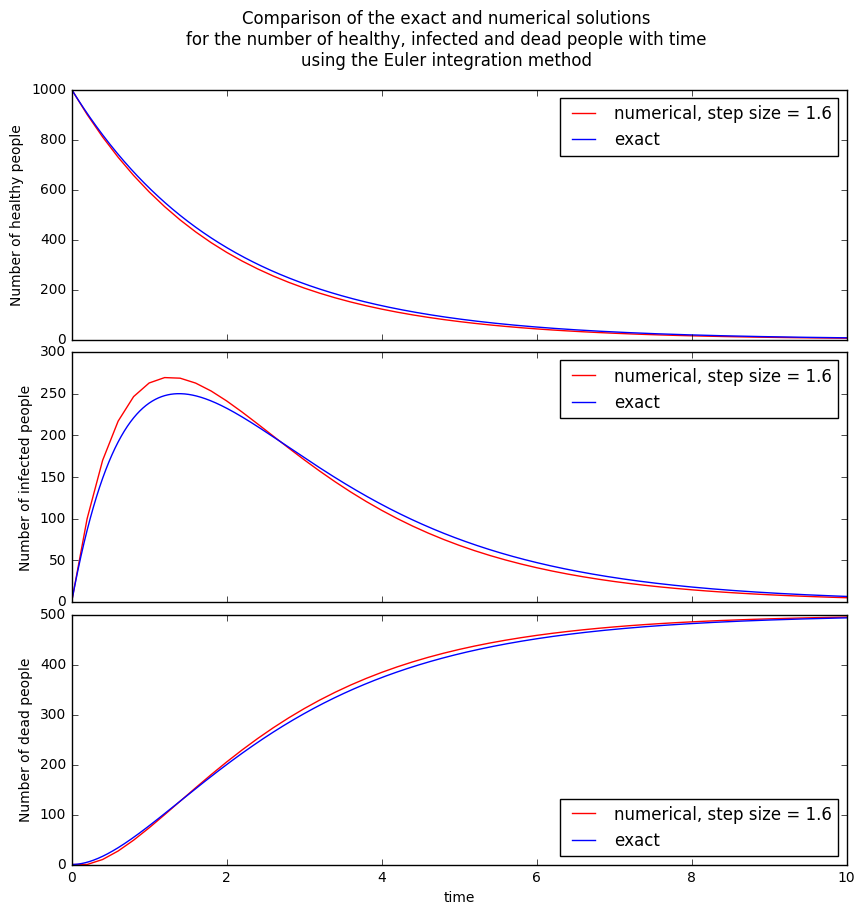

In [10]:
# Creates figure and axes for the three subplots
fig1, (axHealthy, axIll, axDead) = plt.subplots(3, figsize=(10, 10))

# Plots the exact and numeric solutions for each subplot
axHealthy.plot(T, X, 'r-')
axHealthy.hold('on')
axHealthy.plot(T_exact, X_exact, 'b-')

axIll.plot(T, Y, 'r-')
axIll.hold('on')
axIll.plot(T_exact, Y_exact, 'b-')

axDead.plot(T, Z, 'r-')
axDead.hold('on')
axDead.plot(T_exact, Z_exact, 'b-')

# Sets figure title
fig1.suptitle('''Comparison of the exact and numerical solutions
for the number of healthy, infected and dead people with time
using the Euler integration method''',
              fontsize=12)

# Sets the legend for the subplots
axHealthy.legend(['numerical, step size = {}'.format(Δt), 'exact'])
axIll.legend(['numerical, step size = {}'.format(Δt), 'exact'])
axDead.legend(['numerical, step size = {}'.format(Δt), 'exact'],
              loc='lower right')

# Sets the y axis labels for the subplots
axHealthy.set_ylabel('Number of healthy people')
axIll.set_ylabel('Number of infected people')
axDead.set_ylabel('Number of dead people')

# Sets the x axis label
axDead.set_xlabel('time')

# Moves subplots together
fig1.subplots_adjust(hspace=0.05)

# Removes numbering on x axes for top two plots
axHealthy.xaxis.set_ticklabels([])
axIll.xaxis.set_ticklabels([]);

#### Extension 2

We can plot the error as a function of the interval size. This is very similar to the pervious plot, but here, the values over which we iterate are different, and instead of plotting for each $\Delta t$, we instead store the average error from the exact result to be plotted outside the loop.

For this, we need to import the math module for the rounding.

In [11]:
import math

We define out starting dt value, `dt`, and also the change in dt for each iteration, `change_in_dt`, and the smallest value of dt (required to stop the program from iterating over values which cause it to crash), `min_dt`, and the number of values we will be iterating over so we can define the length of the arrays to hold our errors, `number_of_dt` (note, this has to be rounded down so it's an integer number).

In [12]:
# Starting Δt value
Δt = 0.01

# Sets a sensible step size of change in Δt values
change_in_Δt = Δt/100

# Sets the smallest Δt to iterate until
min_Δt = 0.001

# Calculates the numer of Δt values we'll be using
number_of_Δt = math.floor((Δt-min_Δt)/change_in_Δt) + 1

We then initialise the arrays to hold the errors for each dt value so we can plot after the loop.

In [13]:
# Initialises arrays filled with zeros
Xerror = np.zeros(number_of_Δt)
Yerror = np.zeros(number_of_Δt)
Zerror = np.zeros(number_of_Δt)
Δtvalue = np.zeros(number_of_Δt)

We first create a  ticker `k` which indicates what iteration of the loop  through different dt values we are currently on, and therefore this allows us to store the errors and dt values using k as the index number. We then start the loop over dt values, starting at the original dt value, and it decreases the dt values each iteration until some minimum level. We then need to reset the x,y,z and error values to zero for the start of the next loop. The next loop (whcih is inside the dt decreasing loop) calculates the numerical sulution for the current dt value.

Much of the contents of this loop is similar to the previous Euler numerical caluation, but here, at each integration step, we compare the numerical solution with the exact solution at the current t value, and calculates this error. The error is added up over the integration to get the total error (the error for each step summed over all steps).

Back in the dt decreasing loop, it calculates the average error per step and stores it in `Xerror` etc, and stores the current dt value in `dtvalue`. It also ticks the `k` value over to the next, and also increases the `dt` value for the next iteration of the loop.

In [14]:
k = 0

# Iterating until a minimum step size is reached
while Δt >= min_Δt:

    # Reinitialises the intial values for each loop
    x = N
    y = 0
    z = 0

    # Resets the error values to zero
    current_errorX = 0
    total_errorX = 0
    current_errorY = 0
    total_errorY = 0
    current_errorZ = 0
    total_errorZ = 0

    # Creates a loop to calculate the solution and the average error
    # Note: this is for the current dt
    for j in range(0, length):

        # Sets the values for the current iteration in the integration
        # Note that we don't store them like we did before
        X = x
        Y = y
        Z = z
        T = Δt * j

        # Calculates all exact values
        X_exact = (N * np.exp(-α*T))
        Y_exact = ((α * N) / (β + γ - α) *
                   (np.exp(-α * T) - np.exp(-(β + γ)*T)))
        Z_exact = ((α * γ * N) / (β + γ - α) *
                   ((1 - np.exp(-α*T))/α -
                    (1-np.exp(-(β + γ)*T))/(β + γ)))

        # Calculates the current error
        current_errorX = abs(X-X_exact)
        total_errorX += current_errorX
        current_errorY = abs(Y-Y_exact)
        total_errorY += current_errorY
        current_errorZ = abs(Z-Z_exact)
        total_errorZ += current_errorZ

        # Temporary values of x, y and z are needed to store the current values
        xtemp = x
        ytemp = y
        ztemp = z

        # Calulates next value of x, y, z from the current values and gradients
        # These values are added to the arrays on the next iteration.
        x = xtemp - α*xtemp*Δt
        y = ytemp + α*xtemp*Δt - β*ytemp*Δt - γ*ytemp*Δt
        z = ztemp + γ*ytemp*Δt

    # Calculates the average error and stores it in an array
    Xerror[k] = total_errorX/length
    Yerror[k] = total_errorY/length
    Zerror[k] = total_errorZ/length

    # Stores the dt value in an array
    Δtvalue[k] = Δt

    # Ticks the k index value over for the next iteration
    k += 1

    # Increases the counter for the dt iteration
    Δt -= change_in_Δt

Here, we plot the average errors, `Xerror`, `Yerror` and `Zerror` as a function of the interval size, `dt`.

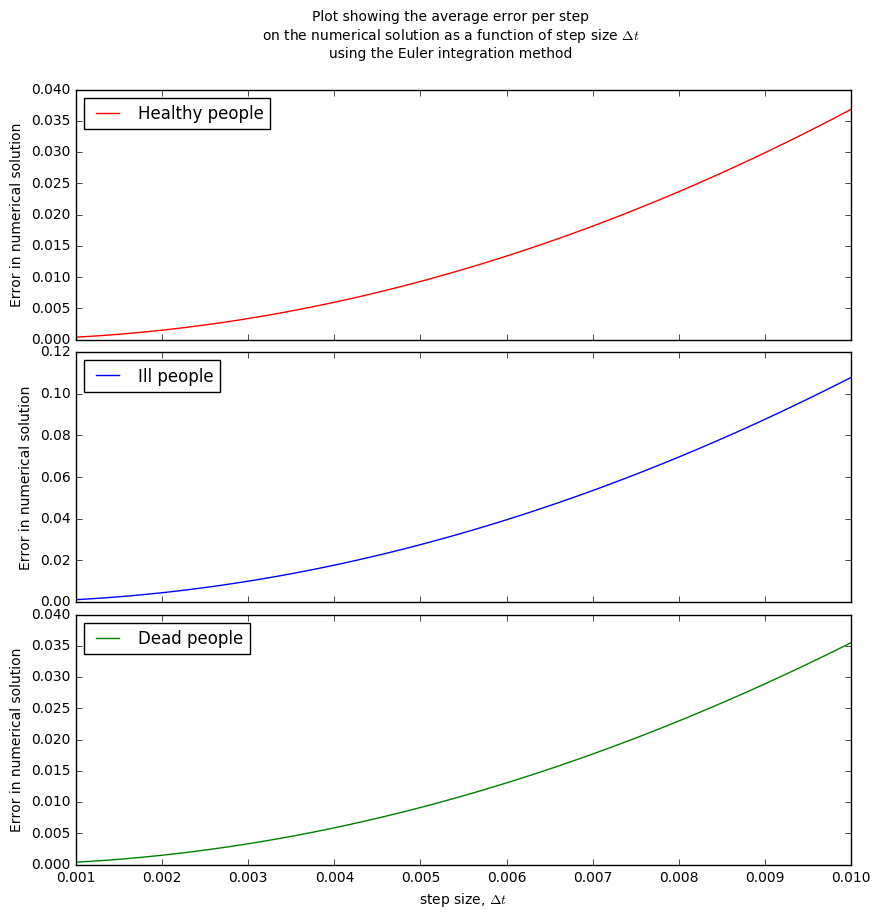

In [15]:
# Creates figure and axes for the three subplots
fig3, (axHealthy3, axIll3, axDead3) = plt.subplots(3, figsize=(10, 10))

# Plots the exact and numeric solutions for each subplot
axHealthy3.plot(Δtvalue, Xerror, 'r-')
axIll3.plot(Δtvalue, Yerror, 'b-')
axDead3.plot(Δtvalue, Zerror, 'g-')

# Sets figure title
fig3.suptitle('''Plot showing the average error per step
on the numerical solution as a function of step size $\Delta t$
using the Euler integration method''')

# Sets the legend for the subplots
axHealthy3.legend(['Healthy people'], loc='upper left')
axIll3.legend(['Ill people'], loc='upper left')
axDead3.legend(['Dead people'], loc='upper left')

# Sets the y axis labels for the subplots
axHealthy3.set_ylabel('Error in numerical solution')
axIll3.set_ylabel('Error in numerical solution')
axDead3.set_ylabel('Error in numerical solution')

# Sets the x axis label
axDead3.set_xlabel('step size, $\Delta t$')

# Moves subplots together
fig3.subplots_adjust(hspace=0.05)

# Removes numbering on x axes for top two plots
axHealthy3.xaxis.set_ticklabels([])
axIll3.xaxis.set_ticklabels([]);

From above, we can see that the shape of the graph is the same for each three plots although there is a little variation in the size of the error.

However, it might be more interesting to test the dependence of the error- that the error goes as the square of the step size.

The code below is almost exactly the same as the previous plot, with the exception that we are plotting the errors against `dtvalue**2` to show that  $\text{(error per step size)} \propto \text{(step size)}^2$.

We expect to see a linear relationship.

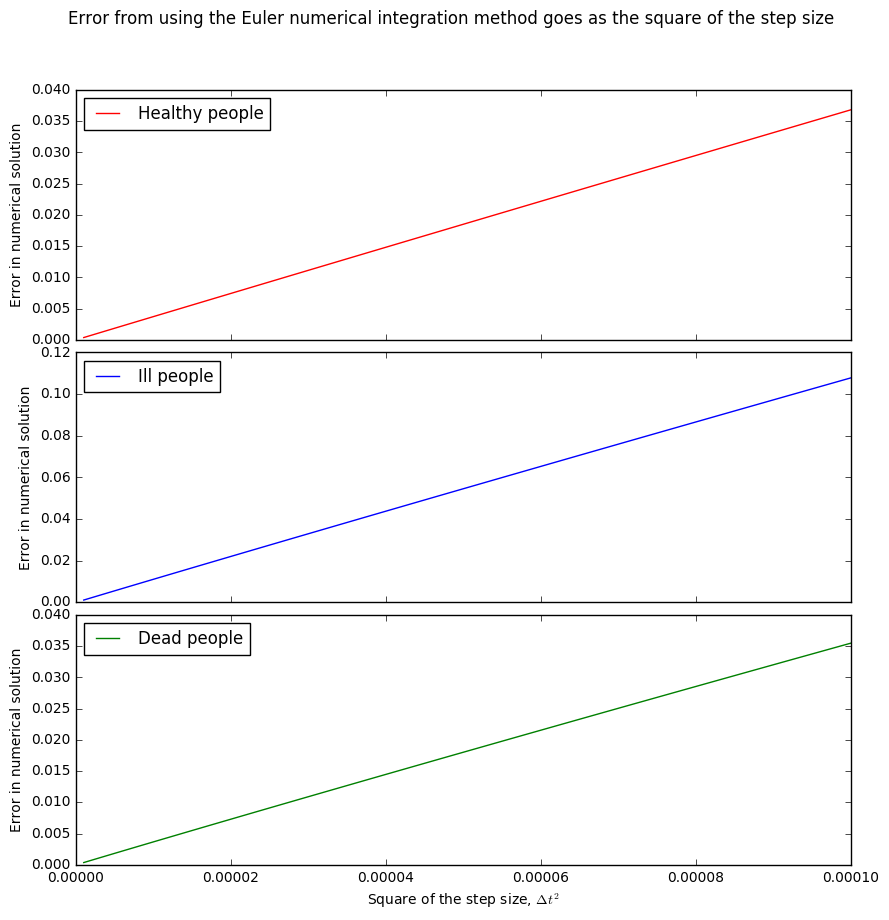

In [16]:
# Creates figure and exes for the three subplots
fig4, (axHealthy4, axIll4, axDead4) = plt.subplots(3, figsize=(10, 10))

# Plots the exact and numeric solutions for each subplot
axHealthy4.plot(Δtvalue**2, Xerror, 'r-')
axIll4.plot(Δtvalue**2, Yerror, 'b-')
axDead4.plot(Δtvalue**2, Zerror, 'g-')

# Sets figure title
fig4.suptitle("Error from using the Euler numerical integration method goes as the square of the step size", 
              fontsize=12)

# Sets the legend for the subplots
axHealthy4.legend(['Healthy people'], loc='upper left')
axIll4.legend(['Ill people'], loc='upper left')
axDead4.legend(['Dead people'], loc='upper left')

# Sets the y axis labels for the subplots
axHealthy4.set_ylabel('Error in numerical solution')
axIll4.set_ylabel('Error in numerical solution')
axDead4.set_ylabel('Error in numerical solution')

# Sets the x axis label
axDead4.set_xlabel('Square of the step size, $ \Delta t^2$')

# Moves subplots together
fig4.subplots_adjust(hspace=0.05)

# Removes numbering on x axes for top two plots
axHealthy4.xaxis.set_ticklabels([])
axIll4.xaxis.set_ticklabels([]);